# 라이브러리 추가

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import sys
from collections import Counter

# 파일 읽어오기   
* 파일 경로를 가져온다.
    * 만약 google drive를 통해 파일을 가져온다면 아래와 같이 파일 경로를 찾아 오자.
    * `!find /content/drive/MyDrive/ -name users.json`

In [3]:
file_path = input("file path plz :)(users.json) >>")
users_data = pd.read_json(file_path, lines=True)

users_data.head(5)

,keyword_list,following_list,id
0,[],"[@perytail, @brunch]",#901985d8bc4c481805c4a4f911814c4a
1,[],"[@holidaymemories, @wadiz, @sciforus, @dailydu...",#1fd89e9dcfa64b45020d9eaca54e0eed
2,[],"[@commerceguy, @sunsutu, @kakao-it, @joohoonja...",#1d94baaea71a831e1f33e1c6bd126ed5
3,[],"[@amberjeon48, @forsy20, @nemotokki, @hawann, ...",#04641c01892b12dc018b1410e4928c0d
4,[],"[@dwcha7342, @iammento, @kakao-it, @dkam, @ant...",#65bcaff862aadff877e461f54187ab62


* users.json: 사용자 정보

  * 가입한 사용자(작가 혹은 독자)의 정보입니다.
  * 필드 설명
    * keyword_list: 최근 며칠간 작가 글로 유입되었던 검색 키워드
    * following_list: 구독 중인 작가 리스트
    * id: 사용자 식별자
  * 총 310,758명의 정보가 있습니다. 탈퇴 등의 이유로 사용자 정보가 없을 수 있습니다.


# keyword_list

In [4]:
keyword_list = pd.DataFrame([j for i in users_data["keyword_list"].tolist() for j in i]).groupby("keyword").sum().sort_values("cnt", ascending=False)

keyword_list.head(5)

,cnt
keyword,
조윤선,6204
타다,4486
부부의 날,4113
뱃살 빼는 최고의 방법,3842
마블 영화 순서,2451


In [5]:
keyword_list.describe()

,cnt
count,372226.000000
mean,3.548739
std,25.447412
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6204.000000


# following_list

In [6]:
following_list = pd.DataFrame(Counter([j for i in users_data["following_list"].tolist() for j in i]).most_common())

following_list.head(5)

,0,1
0,@brunch,292413
1,@dryjshin,9011
2,@tenbody,8615
3,@roysday,8500
4,@yumileewyky,6116


In [7]:
following_list.describe()

,1
count,16905.000000
mean,154.799113
std,2284.287830
min,1.000000
25%,5.000000
50%,17.000000
75%,80.000000
max,292413.000000


In [8]:
following_list.drop(0).describe()

,1
count,16904.000000
mean,137.509820
std,405.886916
min,1.000000
25%,5.000000
50%,17.000000
75%,80.000000
max,9011.000000


In [9]:
users_data['num_following'] = users_data['following_list'].apply(lambda x: len(x))

In [12]:
# following을 하지 않는 user
following_x = users_data[users_data['num_following'] == 0] 

In [20]:
following_x.describe()

,num_following
count,7268.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


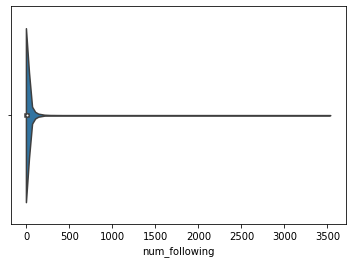

In [19]:
sns.violinplot(x=users_data['num_following'])

In [27]:
users_data.describe()

,num_following
count,310758.000000
mean,8.420955
std,30.286427
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,3528.000000
